In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df=pd.read_csv('heart_disease_data.csv')

In [4]:
df.shape

(303, 14)

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [9]:
#1-->defective hearts
#0-->non-defective
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [11]:
df.std()

age          9.082101
sex          0.466011
cp           1.032052
trestbps    17.538143
chol        51.830751
fbs          0.356198
restecg      0.525860
thalach     22.905161
exang        0.469794
oldpeak      1.161075
slope        0.616226
ca           1.022606
thal         0.612277
target       0.498835
dtype: float64

In [12]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [15]:
x=df.drop('target',axis=1)
y=df['target']

In [36]:
#splitting the data into test and train using train_test_data
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2,
                                              stratify=y,random_state=2)

In [37]:
lr=LogisticRegression()

In [38]:
print(x.shape,x_train.shape,x_test.shape)

(303, 13) (242, 13) (61, 13)


In [39]:
lr.fit(x_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [89]:
train_pred=lr.predict(x_train)
train_pred_acc=accuracy_score(y_train,train_pred)
print(train_pred_acc)

0.8512396694214877


In [90]:
test_pred=lr.predict(x_test)
test_pred_acc=accuracy_score(y_test,test_pred)
print(test_pred_acc)

0.819672131147541


# Confusion Matrix

In [75]:
from sklearn.metrics import confusion_matrix

In [77]:
cf_matrix= confusion_matrix(y_test, test_pred)

In [78]:
print(cf_matrix)

[[23  5]
 [ 6 27]]


In [88]:
#extracting the values
tp,tn,fp,fn,=cf_matrix.ravel()
print(tp,tn,fp,fn)

23 5 6 27


In [83]:
import seaborn as sns

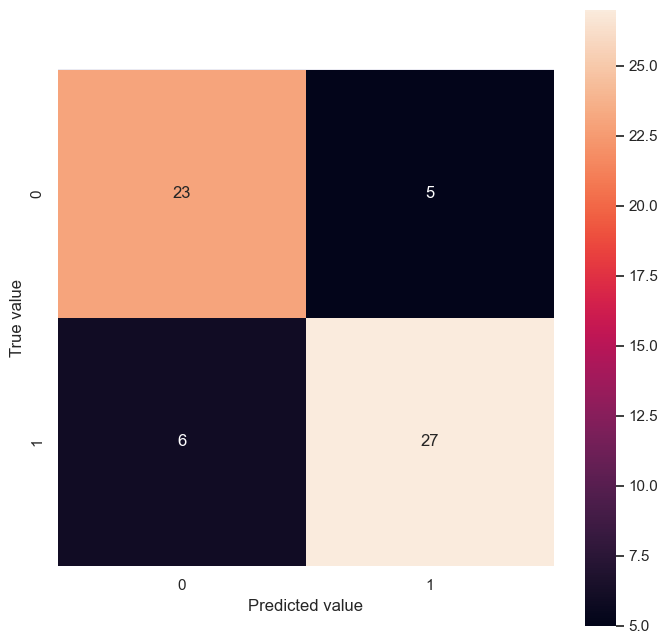

In [85]:
sns.set()
plt.figure(figsize=(8,8))
sns.heatmap(cf_matrix, cbar=True, square=True, annot=True)
plt.xlabel('Predicted value')
plt.ylabel('True value')
plt.show()

#1-->negative 
#0-->positive

# Precision validation metric

In [100]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [91]:
#precesion for training data
pre_train=precision_score(y_train,train_pred)
print(pre_train)

0.8287671232876712


In [92]:
#precesion for test data
pre_test=precision_score(y_test,test_pred)
print(pre_test)

0.84375


# Recall validation metric

In [96]:
#recall score for training data
recall_train=recall_score(y_train,train_pred)
print(recall_train)

0.9166666666666666


In [97]:
#recall score for test data
recall_test=recall_score(y_test,test_pred)
print(recall_test)

0.8181818181818182


# F1 score validation metric

In [101]:
#F1 score for training data
F1_train=f1_score(y_train,train_pred)
print(F1_train)

0.8705035971223022


In [102]:
#F1 score for test data
F1_test=f1_score(y_test,test_pred)
print(F1_test)

0.8307692307692308


# Precision, recall, f1 score function

In [103]:
def per_recall_f1(true_labels, pred_labels):
    pre_value=precision_score(true_labels,pred_labels)
    recall_value=recall_score(true_labels,pred_labels)
    f1_value=f1_score(true_labels,pred_labels)
    
    print('precision value: ',pre_value)
    print('recall value: ',recall_value)
    print('f1 value: ',f1_value)

In [104]:
#test data
per_recall_f1(y_test,test_pred)

precision value:  0.84375
recall value:  0.8181818181818182
f1 value:  0.8307692307692308


In [105]:
#train data
per_recall_f1(y_train,train_pred)

precision value:  0.8287671232876712
recall value:  0.9166666666666666
f1 value:  0.8705035971223022


# using train_test_split
comparing the performance of the models

In [42]:
models=[LogisticRegression(max_iter=1000),SVC(kernel='linear'),KNeighborsClassifier(),RandomForestClassifier()]

In [43]:
def compare_models_train_test():
    for model in models:
        model.fit(x_train,y_train)
        test_data_pred=model.predict(x_test)
        acc=accuracy_score(y_test,test_data_pred)
        
        print('The accuracy score of the ',model,' model: ',acc)

In [44]:
compare_models_train_test()

The accuracy score of the  LogisticRegression(max_iter=1000)  model:  0.8032786885245902
The accuracy score of the  SVC(kernel='linear')  model:  0.819672131147541
The accuracy score of the  KNeighborsClassifier()  model:  0.6229508196721312
The accuracy score of the  RandomForestClassifier()  model:  0.7704918032786885


# cross validataion

In [47]:
#using cross_val_score
#cv tells how many folds to split into
cv_score_lr= cross_val_score(LogisticRegression(max_iter=1000),x,y,cv=5)

In [61]:
print(cv_score_lr)
mean_acc=cv_score_lr.mean()
total=mean_acc*100
total_rounded=round(total,2)

[0.80327869 0.86885246 0.85245902 0.86666667 0.75      ]


In [62]:
print('Mean accuracy for Logistic Regression: ',total_rounded,'%')

Mean accuracy for Logistic Regression:  82.83 %


In [63]:
#making a common function
models1=[LogisticRegression(max_iter=1000),SVC(kernel='linear'),KNeighborsClassifier(),RandomForestClassifier()]

In [69]:
def cross_validation():
    for model in models1:
        cv_score=cross_val_score(model,x,y,cv=5)
        print(cv_score)
        
        #finding the mean
        mean_acc=cv_score.mean()
        
        #finding the accuracy
        total=mean_acc*100
        total_rounded=round(total,2)
        print('Mean accuracy for ',model,': ',total_rounded,'%')
        print('\n')

In [70]:
cross_validation()

[0.80327869 0.86885246 0.85245902 0.86666667 0.75      ]
Mean accuracy for  LogisticRegression(max_iter=1000) :  82.83 %


[0.81967213 0.8852459  0.80327869 0.86666667 0.76666667]
Mean accuracy for  SVC(kernel='linear') :  82.83 %


[0.60655738 0.6557377  0.57377049 0.73333333 0.65      ]
Mean accuracy for  KNeighborsClassifier() :  64.39 %


[0.83606557 0.90163934 0.83606557 0.83333333 0.8       ]
Mean accuracy for  RandomForestClassifier() :  84.14 %


